## MTA Subway Stations dataset cleaning

In this notebook we will clean the [Subway Stations dataset](https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49) made available by MTA.

Let's start by opening and examining it.

In [1]:
import pandas as pd

stations = pd.read_csv('data/DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
stations.head(4)

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"


Let's extract the latitude and longitude from the dataset. For that we will use `add_coord_columns()` which is defined in `coordinates.py`. Notice that the coordinates are reversed as in `(longitude, latitude)`.

In [2]:
import coordinates as coord

coord.add_coord_columns(stations, 'the_geom', sep=' ', _reversed=True)
stations.loc[:, ('latitude', 'longitude')].head()

,latitude,longitude
0,40.730054,-73.991070
1,40.718803,-74.000193
2,40.761728,-73.983849
3,40.680862,-73.974999
4,40.664714,-73.894886


Let's quickly plot the stations coordinates to have a feel for their geographical location:

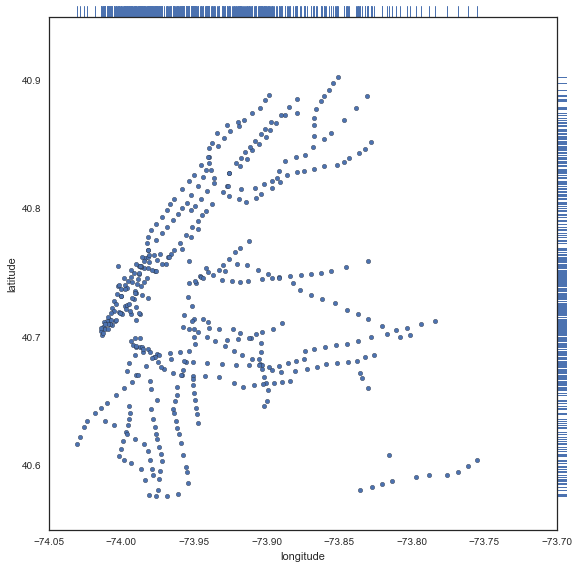

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

grid = sns.JointGrid(stations['longitude'], stations['latitude'], space=0, size=8, ratio=50)
grid.plot_joint(plt.scatter)
grid.plot_marginals(sns.rugplot, height=1)

plt.savefig('figures/all_entrances.png', bbox_inches='tight')

Now let's just clean the `DataFrame` columns and save it as a `pickle` binary file for later use in the recommender notebook.

In [4]:
stations.rename(columns={'NAME': 'station', 'LINE': 'lines', 'NOTES': 'notes'}, inplace=True)
relevant_cols = ['station', 'latitude', 'longitude', 'lines', 'notes']
df_to_pickle = stations.loc[:, relevant_cols]

df_to_pickle.sort_values(by='station', inplace=True)
df_to_pickle.head()

,station,latitude,longitude,lines,notes
158,103rd St,40.799446,-73.968379,1,1-all times
160,103rd St,40.796061,-73.961370,A-B-C,"A-nights, B-weekdays and evenings, C-all times..."
457,103rd St,40.790600,-73.947478,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
188,103rd St - Corona Plaza,40.749865,-73.862700,7,7-all times
97,104th St,40.681711,-73.837683,A-S,S Euclid Av to Ozone Park-Lefferts Blvd-nights...


In [5]:
df_to_pickle.to_pickle('pickle/stations_locations.p')